# IOD Project 3: More machine learning with MLB statistics

Data source: Stathead Baseball by Sports Reference

https://stathead.com/baseball/

Data parameters: All MLB batters who have hit at least 100 home runs and retired no later than 2018.

Data caveats and limitations:

1. There is some dispute as to what constitutes a major league, especially in the pre-integration era. I have included every league Stathead considers major.

2. Incomplete data, especially for the Negro Leagues, where many barnstorming games were played for which there is little information available.

3. HOF voting is not statistically objective. Certain players with notable hitting statistics have been excluded for non-playing reasons (such as Pete Rose) or steroid controversies. Out of the 26 eligible members of the 500 Home Run Club, 7 are not in the Hall of Fame: Barry Bonds (1st overall), Alex Rodriguez (4th), Sammy Sosa (8th), Mark McGwire (10th), Rafael Palmeiro (12th), Manny Ramirez (14th), and Gary Sheffield (25th). All of these players have connections to steroid use.

Data dictionary, copied from Stathead.

Rk -- Rank
HR -- Home Runs
From -- From Season
To -- To Season
G -- Games Played
PA -- Plate Appearances
When available, we use actual plate appearances from play-by-play game accounts
Otherwise estimated using AB + BB + HBP + SF + SH,
which excludes catcher interferences.
When this color click for a summary of each PA.
AB -- At Bats
R -- Runs Scored
H -- Hits
1B -- Singles
2B -- Doubles
3B -- Triples
HR -- Home Runs
RBI -- Runs Batted In
SB -- Stolen Bases
CS -- Caught Stealing
BB -- Bases on Balls/Walks
SO -- Strikeouts
BA -- Hits/At Bats
For recent years, leaders need 3.1 PA
per team game played
Bold indicates highest BA using current stats
Gold means awarded title at end of year.
OBP -- (H + BB + HBP)/(At Bats + BB + HBP + SF)
For recent years, leaders need 3.1 PA
per team game played
SLG -- Total Bases/At Bats or
(1B + 2*2B + 3*3B + 4*HR)/AB
For recent years, leaders need 3.1 PA
per team game played
OPS -- On-Base + Slugging Percentages
For recent years, leaders need 3.1 PA
per team game played
OPS+ -- OPS+
100*[OBP/lg OBP + SLG/lg SLG - 1]
Adjusted to the player’s ballpark(s)
TB -- Total Bases
Singles + 2 x Doubles + 3 x Triples + 4 x Home Runs.
GIDP -- Double Plays Grounded Into
Only includes standard 6-4-3, 4-3, etc. double plays.
First tracked in 1933.
For gamelogs only in seasons we have play-by-play, we include triple plays as well.
All official seasonal totals do not include GITP's.
HBP -- Times Hit by a Pitch
SH -- Sacrifice Hits (Sacrifice Bunts)
SF -- Sacrifice Flies
First tracked in 1955.
IBB -- Intentional Bases on Balls
First tracked in 1955.
Pos -- Positions Played
The positions either followed by the games played at that position
or in order of games or innings played.
For a single season, * indicates they played at least 2/3rds of the team games there
Positions after / indicate less than ten games played at those positions.
For career, a + sign means more than 300 games at that position and
a - sign means less than 30 games.

# 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
from ipywidgets import *
from IPython.display import display
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score

from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LinearRegression

Note - 1s and 0s were somehow reversed in the binary, thus I've had to pass additional arguments and reverse the numbers in several places. I've done my best to control for this quirk and ensure it does not impact the results.

Note - Data cleaning was done in a separate notebook which I have also turned in. The cleaned dataset, also turned in, is loaded directly here.

In [5]:
mlb = pd.read_csv("/Users/matthewcavanaugh/Desktop/IOD Data camp/Project 3/100 Home runs cleaned.csv", index_col='Player')
mlb

,Debuted,Debut_age,Retired,Ret_age,G,PA,AB,R,H,1B,...,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,HOF
Player,,,,,,,,,,,,,,,,,,,,,
Barry Bonds,1986,21,2007,42,2986,12606,9847,2227,2935,1495,...,0.607,1.051,182,5976,165.0,106,4.0,91.0,688.0,0
Henry Aaron,1954,20,1976,42,3298,13941,12364,2174,3771,2294,...,0.555,0.928,155,6856,328.0,32,21.0,121.0,293.0,1
Babe Ruth,1914,19,1935,40,2503,10628,8399,2174,2873,1517,...,0.690,1.164,206,5793,2.0,43,114.0,0.0,79.0,1
Alex Rodriguez,1994,18,2016,40,2784,12207,10566,2021,3115,1840,...,0.550,0.930,140,5813,261.0,176,16.0,111.0,97.0,0
Willie Mays,1948,17,1973,42,3005,12545,10924,2068,3293,1967,...,0.557,0.940,155,6080,251.0,45,13.0,91.0,214.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Augie Galan,1934,22,1949,37,1742,7007,5937,1004,1706,1196,...,0.419,0.810,122,2490,72.0,25,62.0,0.0,45.0,0
Mike Jacobs,2005,24,2012,31,569,2140,1949,248,493,271,...,0.473,0.786,104,921,49.0,7,1.0,13.0,18.0,0
John Kruk,1986,25,1995,34,1200,4603,3897,582,1170,837,...,0.446,0.842,134,1737,92.0,2,12.0,43.0,83.0,0


# 2. Correlation matrix, quick visualizations and stats

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

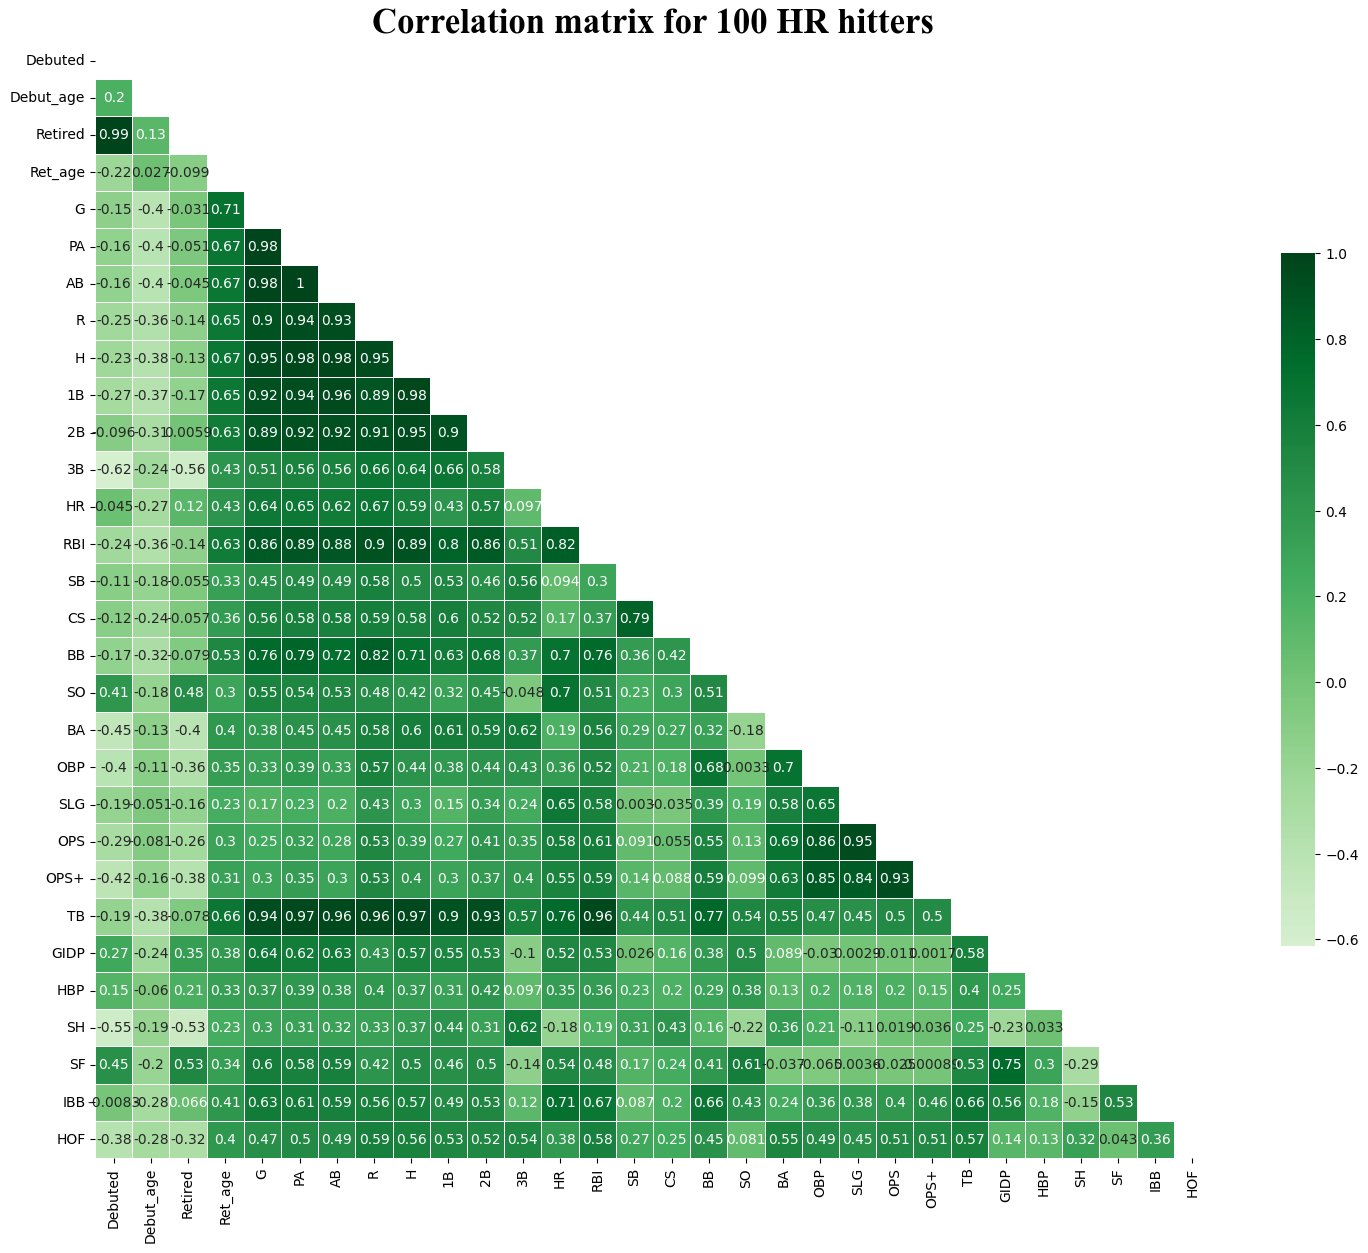

In [7]:
#sns.set(style="whitegrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(mlb.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mlb.corr(numeric_only = True), mask=mask, cmap='Greens', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation matrix for 100 HR hitters", font='Times new roman', fontsize=25, fontweight='bold')
#plt.savefig("Correlation matrix for 100 HR hitters.png")
plt.show()

Sorting columns by correlation to HOF, most to least

In [8]:
corrarray = np.array(mlb.corr()['HOF'].sort_values(ascending=False).index)
corrarray

array(['HOF', 'R', 'RBI', 'TB', 'H', 'BA', '3B', '1B', '2B', 'OPS+',
       'OPS', 'PA', 'AB', 'OBP', 'G', 'BB', 'SLG', 'Ret_age', 'HR', 'IBB',
       'SH', 'SB', 'CS', 'GIDP', 'HBP', 'SO', 'SF', 'Debut_age',
       'Retired', 'Debuted'], dtype=object)

In [9]:
fame = mlb[mlb['HOF'] == 1]
nofame = mlb[mlb['HOF'] == 0]

In [10]:
nofame500 = nofame[nofame['HR'] >= 500]
nofame500

,Debuted,Debut_age,Retired,Ret_age,G,PA,AB,R,H,1B,...,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,HOF
Player,,,,,,,,,,,,,,,,,,,,,
Barry Bonds,1986,21,2007,42,2986,12606,9847,2227,2935,1495,...,0.607,1.051,182,5976,165.0,106,4.0,91.0,688.0,0
Alex Rodriguez,1994,18,2016,40,2784,12207,10566,2021,3115,1840,...,0.550,0.930,140,5813,261.0,176,16.0,111.0,97.0,0
Sammy Sosa,1989,20,2007,38,2354,9896,8813,1475,2408,1375,...,0.534,0.878,128,4704,202.0,59,17.0,78.0,154.0,0
Mark McGwire,1986,22,2001,37,1874,7660,6187,1167,1626,785,...,0.588,0.982,163,3639,147.0,75,3.0,78.0,150.0,0
Rafael Palmeiro,1986,21,2005,40,2831,12046,10472,1663,3020,1828,...,0.515,0.885,132,5388,232.0,87,15.0,119.0,172.0,0
Manny Ramirez,1993,21,2011,39,2302,9774,8244,1544,2574,1452,...,0.585,0.996,154,4826,243.0,109,2.0,90.0,216.0,0
Gary Sheffield,1988,19,2009,40,2576,10947,9217,1636,2689,1686,...,0.514,0.907,140,4737,235.0,135,9.0,111.0,130.0,0


In [11]:
import dataframe_image as dfi

In [12]:
#dfi.export(nofame500, "no fame 500.png")

# First we will test the accuracy two binary machine learning models - Support Vector Classifier and Random Forest Classifier - in predicting whether each player in this dataset has been named to the Baseball Hall of Fame.

# 3. Support Vector Classifier (Refer to Lab 5.3)

In [13]:
mlb = pd.read_csv("/Users/matthewcavanaugh/Desktop/IOD Data camp/Project 3/100 Home runs cleaned.csv", index_col='Player')
mlb

,Debuted,Debut_age,Retired,Ret_age,G,PA,AB,R,H,1B,...,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,HOF
Player,,,,,,,,,,,,,,,,,,,,,
Barry Bonds,1986,21,2007,42,2986,12606,9847,2227,2935,1495,...,0.607,1.051,182,5976,165.0,106,4.0,91.0,688.0,0
Henry Aaron,1954,20,1976,42,3298,13941,12364,2174,3771,2294,...,0.555,0.928,155,6856,328.0,32,21.0,121.0,293.0,1
Babe Ruth,1914,19,1935,40,2503,10628,8399,2174,2873,1517,...,0.690,1.164,206,5793,2.0,43,114.0,0.0,79.0,1
Alex Rodriguez,1994,18,2016,40,2784,12207,10566,2021,3115,1840,...,0.550,0.930,140,5813,261.0,176,16.0,111.0,97.0,0
Willie Mays,1948,17,1973,42,3005,12545,10924,2068,3293,1967,...,0.557,0.940,155,6080,251.0,45,13.0,91.0,214.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Augie Galan,1934,22,1949,37,1742,7007,5937,1004,1706,1196,...,0.419,0.810,122,2490,72.0,25,62.0,0.0,45.0,0
Mike Jacobs,2005,24,2012,31,569,2140,1949,248,493,271,...,0.473,0.786,104,921,49.0,7,1.0,13.0,18.0,0
John Kruk,1986,25,1995,34,1200,4603,3897,582,1170,837,...,0.446,0.842,134,1737,92.0,2,12.0,43.0,83.0,0


In [14]:
#Set features as all columns, except the index and last
#Set target as 'HOF'
X = mlb.iloc[:, 1:]
y = mlb['HOF']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score

### First, let's try creating a model with no parameters defined, and see how it scores.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [18]:
#Set features as all columns, except the index and last
#Set target as 'HOF'
X = mlb.iloc[:, 1:]
y = mlb['HOF']

In [19]:
svc = SVC(probability=False)

In [20]:
svc.fit(X_train, y_train)

SVC()

In [21]:
svc.score(X_train, y_train)

0.8625

In [22]:
y_pred = svc.predict(X)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

In [23]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.67      0.24      0.35        25
           0       0.87      0.98      0.92       135

    accuracy                           0.86       160
   macro avg       0.77      0.61      0.64       160
weighted avg       0.84      0.86      0.83       160



86% accuracy isn't terrible, though it could be improved. But 24% recall is very bad! Let's try to find better parameters.

### Gridsearch for best recall on 1s

In [24]:
svc_params = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear','rbf'],
}


In [25]:
# Create a scoring function that targets recall for class `1`
scorer = make_scorer(recall_score, pos_label=1)

In [26]:
svc_gs = GridSearchCV(SVC(probability=False), svc_params, scoring=scorer, cv=5, verbose=1)

In [27]:
%%time
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 7.36 s, sys: 29.7 ms, total: 7.39 s
Wall time: 7.4 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
             verbose=1)

In [32]:
# Output the best parameters and the corresponding score
print("Best parameters:", svc_gs.best_params_)

Best parameters: {'C': 1, 'gamma': 1.0, 'kernel': 'linear'}


In [33]:
svc_gs_y_pred = svc_gs.best_estimator_.predict(X)
svc_gs_y_train_pred = svc_gs.best_estimator_.predict(X_train)
sgv_gs_y_test_pred = svc_gs.best_estimator_.predict(X_test)

In [34]:
print(classification_report(y_train, svc_gs_y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       135
           1       0.89      1.00      0.94        25

    accuracy                           0.98       160
   macro avg       0.95      0.99      0.97       160
weighted avg       0.98      0.98      0.98       160



### Gridsearch for best precision on 1s

In [35]:
svc_params = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear','rbf'],
}


In [36]:
# Create a scoring function that targets precision for class `1`
scorer = make_scorer(precision_score, pos_label=1)

In [37]:
# Create the GridSearchCV object
svc_gs = GridSearchCV(SVC(probability=False), svc_params, scoring=scorer, cv=5, verbose=1)

In [38]:
# Minimized this one because it gives tons of warning messages, but it works
# Fit the grid search on the training data
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/IOD2/lib/py

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(precision_score, response_method='predict', pos_label=1),
             verbose=1)

In [40]:
# Output the best parameters and the corresponding score
print("Best parameters:", svc_gs.best_params_)

Best parameters: {'C': 1, 'gamma': 1.0, 'kernel': 'linear'}


In [41]:
svc_gs_y_pred = svc_gs.best_estimator_.predict(X)
svc_gs_y_train_pred = svc_gs.best_estimator_.predict(X_train)
sgv_gs_y_test_pred = svc_gs.best_estimator_.predict(X_test)

In [42]:
print(classification_report(y_train, svc_gs_y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       135
           1       0.89      1.00      0.94        25

    accuracy                           0.98       160
   macro avg       0.95      0.99      0.97       160
weighted avg       0.98      0.98      0.98       160



### Gridsearch for best accuracy on 1s

In [43]:
svc_params = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear','rbf'],
}


In [44]:
# Create the GridSearchCV object with accuracy as the scoring metric
svc_gs = GridSearchCV(SVC(probability=False), svc_params, scoring='accuracy', cv=5, verbose=1)

In [45]:
# Fit the grid search on the training data
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [46]:
# Output the best parameters and the corresponding accuracy score
print("Best parameters:", svc_gs.best_params_)
print("Best accuracy score:", svc_gs.best_score_)

Best parameters: {'C': 1, 'gamma': 1.0, 'kernel': 'linear'}
Best accuracy score: 0.8875


In [47]:
from sklearn.metrics import classification_report

In [48]:
# Use the best estimator from the grid search
best_model = svc_gs.best_estimator_

In [49]:
svc_gs_y_pred = svc_gs.best_estimator_.predict(X)
svc_gs_y_train_pred = svc_gs.best_estimator_.predict(X_train)
sgv_gs_y_test_pred = svc_gs.best_estimator_.predict(X_test)

In [50]:
print(classification_report(y_train, svc_gs_y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       135
           1       0.89      1.00      0.94        25

    accuracy                           0.98       160
   macro avg       0.95      0.99      0.97       160
weighted avg       0.98      0.98      0.98       160



All three metrics we measured by agree on the parameters to use:

'C': 1, 'gamma': 1.0, 'kernel': 'linear'

Let's define the model with those parameters.

### With our new parameters, let's define the model again.

In [51]:
svc = SVC(C=1, gamma=1.0, kernel='linear', probability=False)

In [52]:
svc.fit(X_train,y_train)

SVC(C=1, gamma=1.0, kernel='linear')

In [53]:
y_pred = svc.predict(X)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

### Print out the numbers of true positives, false positives, false negatives, and true negatives (for the full dataset).

In [54]:
svc_true_positives = np.sum((y == 1) & (y_pred == 1))
print(f"True Positives: {svc_true_positives}")

svc_false_positives = np.sum((y == 0) & (y_pred == 1))
print(f"False Positives: {svc_false_positives}")

svc_false_negatives = np.sum((y == 1) & (y_pred == 0))
print(f"False Negatives: {svc_false_negatives}")

svc_true_negatives = np.sum((y == 0) & (y_pred == 0))
print(f"True Negatives: {svc_true_negatives}")

True Positives: 97
False Positives: 51
False Negatives: 30
True Negatives: 625


### Create dataframes of each classification type. (This is for something cool we will do later.)

In [55]:
svc_tp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 1]
svc_tp_rows = mlb.iloc[svc_tp_indices]

svc_fp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 1]
svc_fp_rows = mlb.iloc[svc_fp_indices]

svc_fn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 0]
svc_fn_rows = mlb.iloc[svc_fn_indices]

svc_tn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 0]
svc_tn_rows = mlb.iloc[svc_tn_indices]

### Summary reports

In [56]:
def show_summary_report(actual, prediction):
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)
    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')
    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int, labels=[1, 0])
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)
    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Greens', ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='r', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')
    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    plt.show()

In [57]:
y_train_pred = svc.predict(X_train)

Accuracy : 0.9812 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.8929 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 1.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9889                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


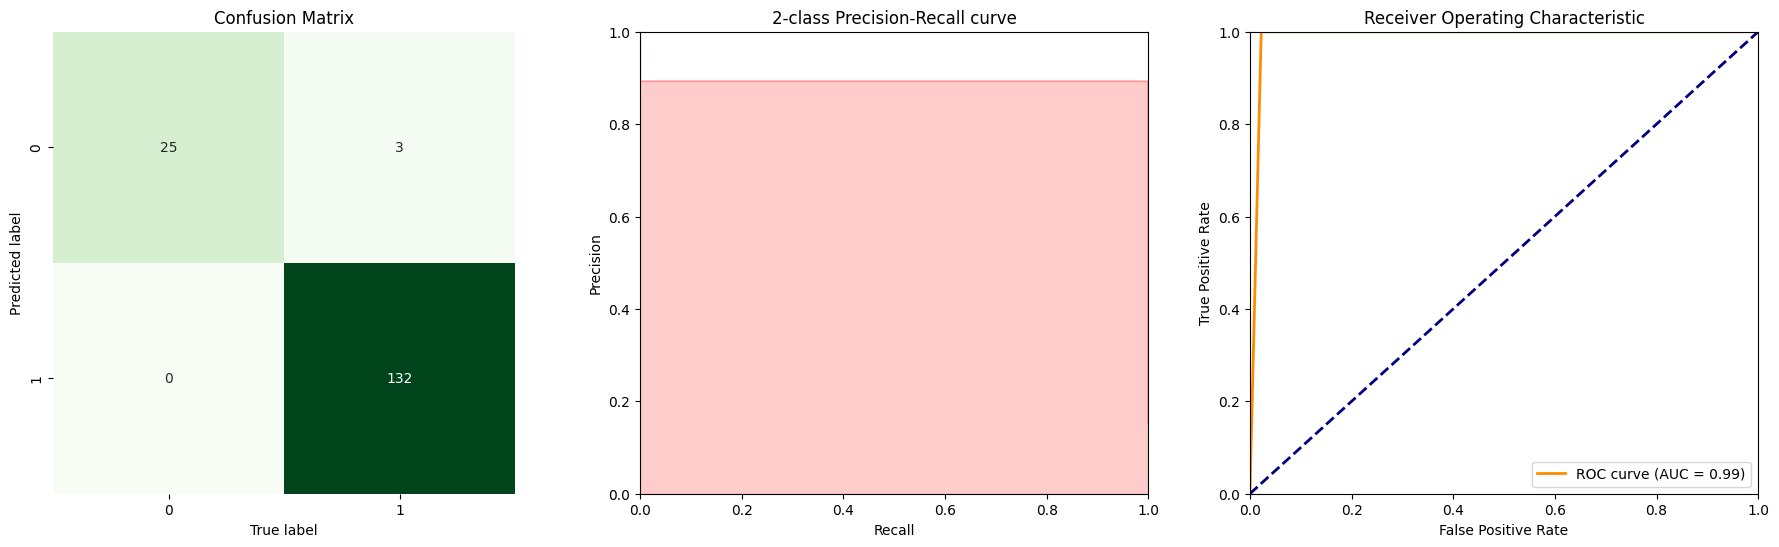

In [58]:
show_summary_report(y_train, y_train_pred)

In [59]:
y_test_pred = svc.predict(X_test)

Accuracy : 0.8787 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.7059 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.8086                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


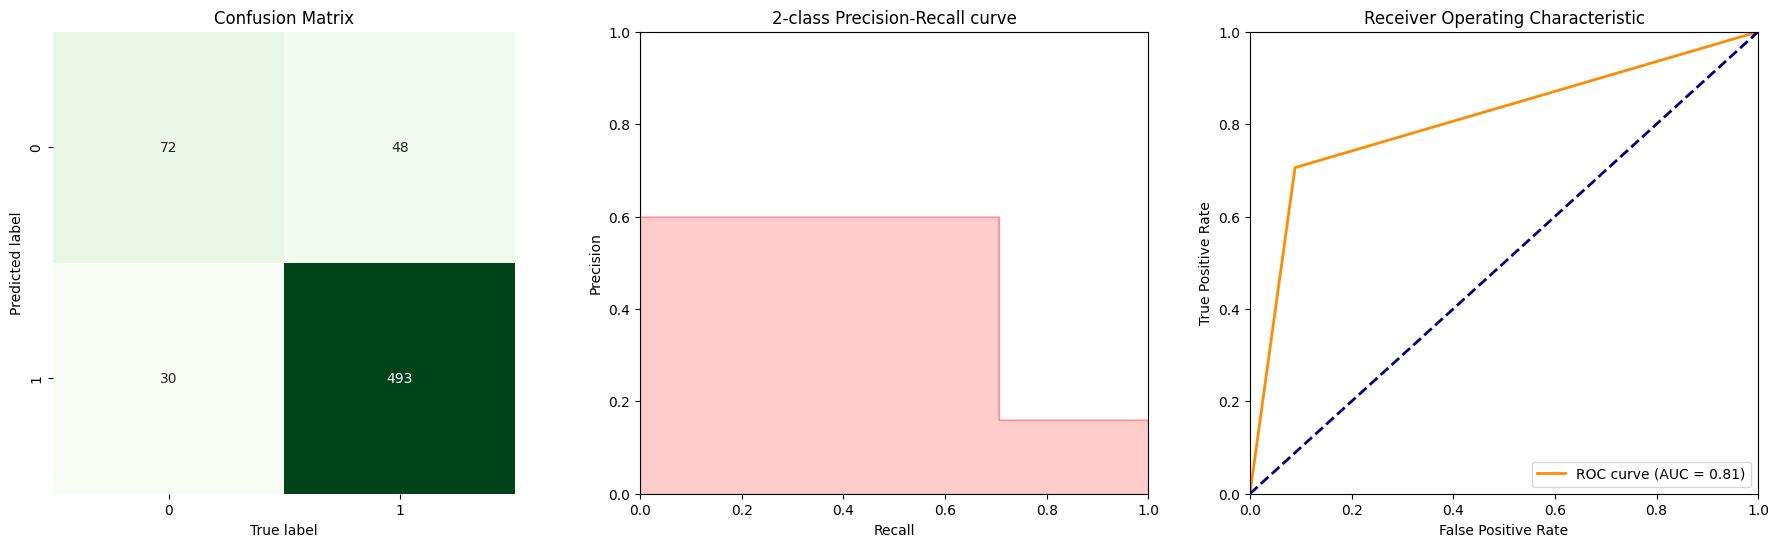

In [60]:
show_summary_report(y_test, y_test_pred)

#### Print out the numbers of true positives, false positives, false negatives, and true negatives in the testing dataset. They should match the confusion matrix in the above report.

In [62]:
svc_test_true_positives = np.sum((y_test == 1) & (y_test_pred == 1))
print(f"True Positives: {svc_test_true_positives}")

svc_test_false_positives = np.sum((y_test == 0) & (y_test_pred == 1))
print(f"False Positives: {svc_test_false_positives}")

svc_test_false_negatives = np.sum((y_test == 1) & (y_test_pred == 0))
print(f"False Negatives: {svc_test_false_negatives}")

svc_test_true_negatives = np.sum((y_test == 0) & (y_test_pred == 0))
print(f"True Negatives: {svc_test_true_negatives}")

True Positives: 72
False Positives: 48
False Negatives: 30
True Negatives: 493


#### Create dataframes of each classification type within the test dataset, just for reference. You can print them out if you like, but we don't need them for what we're doing.

In [68]:
# Identify true positives
svc_test_true_positives = (y_test == 1) & (y_test_pred == 1)
# Extract the rows from X_test corresponding to true positives
svc_test_tp_rows = X_test[svc_test_true_positives]

# Identify false positives
svc_test_false_positives = (y_test == 0) & (y_test_pred == 1)
# Extract the rows from X_test corresponding to false positives
svc_test_fp_rows = X_test[svc_test_false_positives]

# Identify false positives
svc_test_false_negatives = (y_test == 1) & (y_test_pred == 0)
# Extract the rows from X_test corresponding to false negatives
svc_test_fn_rows = X_test[svc_test_false_negatives]

# Identify false positives
svc_test_true_negatives = (y_test == 0) & (y_test_pred == 0)
# Extract the rows from X_test corresponding to true negatives
svc_test_tn_rows = X_test[svc_test_true_negatives]

# 4. Random Forest Classifier

In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

### First, let's try creating a model with no parameters defined, and see how it does.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#Set features as all columns, except the index and last
#Set target as 'AS'
X = mlb.iloc[:, 1:]
y = mlb['HOF']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [73]:
rfc = RandomForestClassifier()

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = rfc.predict(X)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [76]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [77]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       102
           0       0.99      1.00      1.00       541

    accuracy                           0.99       643
   macro avg       1.00      0.98      0.99       643
weighted avg       0.99      0.99      0.99       643



### Just for fun, let's see what the worst possible parameters are.

In [78]:
rfc_params = {
    'bootstrap': [True, False],
    'max_depth': [20, 50, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

In [79]:
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5, verbose=1)

In [80]:
%%time
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 2min 24s, sys: 1.59 s, total: 2min 25s
Wall time: 2min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [81]:
worst_index = rfc_gs.cv_results_['rank_test_score'].argmax()
print("Worst parameters:", rfc_gs.cv_results_['params'][worst_index])

Worst parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
worstrfc = RandomForestClassifier(bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=100)

In [83]:
worstrfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=5)

In [84]:
y_pred = worstrfc.predict(X)
y_train_pred = worstrfc.predict(X_train)
y_test_pred = worstrfc.predict(X_test)

In [85]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [86]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.96      0.90      0.93       102
           0       0.98      0.99      0.99       541

    accuracy                           0.98       643
   macro avg       0.97      0.95      0.96       643
weighted avg       0.98      0.98      0.98       643



### Gridsearch for best recall

In [157]:
rfc_params = {
    'bootstrap': [True, False],
    'max_depth': [20, 50, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

In [158]:
# Create a scoring function that targets recall for class `1`
scorer = make_scorer(recall_score, pos_label=1)

In [159]:
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5, verbose=1)

In [160]:
%%time
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 2min 13s, sys: 826 ms, total: 2min 14s
Wall time: 2min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [161]:
print('Best hyperparameters are '+str(rfc_gs.best_params_))
print('Best score is: ' + str(rfc_gs.best_score_))

Best hyperparameters are {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score is: 1.0


In [162]:
y_pred = rfc_gs.predict(X)
y_train_pred = rfc_gs.predict(X_train)
y_test_pred = rfc_gs.predict(X_test)

In [163]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [164]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       102
           0       1.00      1.00      1.00       541

    accuracy                           1.00       643
   macro avg       0.99      1.00      0.99       643
weighted avg       1.00      1.00      1.00       643



### Gridsearch for best accuracy

In [165]:
rfc_params = {
    'bootstrap': [True, False],
    'max_depth': [20, 50, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

In [166]:
# Create a scoring function that targets recall for class `1`
scorer = make_scorer(accuracy_score, pos_label=1)

In [167]:
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5, verbose=1)

In [168]:
%%time
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 2min 15s, sys: 969 ms, total: 2min 16s
Wall time: 2min 17s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [169]:
print('Best hyperparameters are '+str(rfc_gs.best_params_))
print('Best score is: ' + str(rfc_gs.best_score_))

Best hyperparameters are {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score is: 1.0


In [170]:
y_pred = rfc_gs.predict(X)
y_train_pred = rfc_gs.predict(X_train)
y_test_pred = rfc_gs.predict(X_test)

In [171]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [172]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       102
           0       0.99      1.00      1.00       541

    accuracy                           1.00       643
   macro avg       1.00      0.99      0.99       643
weighted avg       1.00      1.00      1.00       643



### Gridsearch for best precision

In [173]:
rfc_params = {
    'bootstrap': [True, False],
    'max_depth': [20, 50, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

In [174]:
# Create a scoring function that targets recall for class `1`
scorer = make_scorer(precision_score, pos_label=1)

In [175]:
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5, verbose=1)

In [176]:
%%time
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 2min 19s, sys: 1.27 s, total: 2min 20s
Wall time: 2min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [177]:
print('Best hyperparameters are '+str(rfc_gs.best_params_))
print('Best score is: ' + str(rfc_gs.best_score_))

Best hyperparameters are {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score is: 1.0


In [178]:
y_pred = rfc_gs.predict(X)
y_train_pred = rfc_gs.predict(X_train)
y_test_pred = rfc_gs.predict(X_test)

In [179]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [180]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       102
           0       0.99      1.00      0.99       541

    accuracy                           0.99       643
   macro avg       0.99      0.97      0.98       643
weighted avg       0.99      0.99      0.99       643



Just for fun, let's use the worst parameters.

### Just for fun, and to put the model on the save footing as the SVC, let's use the worst parameters we found earlier. I also played around with random states until I find a relatively low testing recall of 84%.

In [87]:
#Set features as all columns, except the index and last
#Set target as 'AS'
X = mlb.iloc[:, 1:]
y = mlb['HOF']

In [88]:
#{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [90]:
rfc = RandomForestClassifier(bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=33)

In [91]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                       random_state=33)

In [92]:
y_pred = rfc.predict(X)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [93]:
print(classification_report(y_train, y_train_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00       135

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [94]:
print(classification_report(y_test, y_test_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.95      0.84      0.89       102
           0       0.97      0.99      0.98       541

    accuracy                           0.97       643
   macro avg       0.96      0.92      0.94       643
weighted avg       0.97      0.97      0.97       643



In [95]:
rfc_true_positives = np.sum((y == 1) & (y_pred == 1))
print(f"True Positives: {rfc_true_positives}")

rfc_false_positives = np.sum((y == 0) & (y_pred == 1))
print(f"False Positives: {rfc_false_positives}")

rfc_false_negatives = np.sum((y == 1) & (y_pred == 0))
print(f"False Negatives: {rfc_false_negatives}")

rfc_true_negatives = np.sum((y == 0) & (y_pred == 0))
print(f"True Negatives: {rfc_true_negatives}")

True Positives: 111
False Positives: 5
False Negatives: 16
True Negatives: 671


### Create dataframes of each classification type. (This is for something cool we will do later.)

In [96]:
rfc_tp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 1]
rfc_tp_rows = mlb.iloc[rfc_tp_indices]

rfc_fp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 1]
rfc_fp_rows = mlb.iloc[rfc_fp_indices]

rfc_fn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 0]
rfc_fn_rows = mlb.iloc[rfc_fn_indices]

rfc_tn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 0]
rfc_tn_rows = mlb.iloc[rfc_tn_indices]

### We've already seen our classification report, but let's make a summary report to see the confusion matrix and ROC curve.

In [97]:
def show_summary_report(actual, prediction):
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)
    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')
    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int, labels=[1, 0])
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)
    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Greens', ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='r', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')
    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    plt.show()

In [98]:
y_pred = rfc.predict(X)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

Accuracy : 0.9673 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9451 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.8431 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9169                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


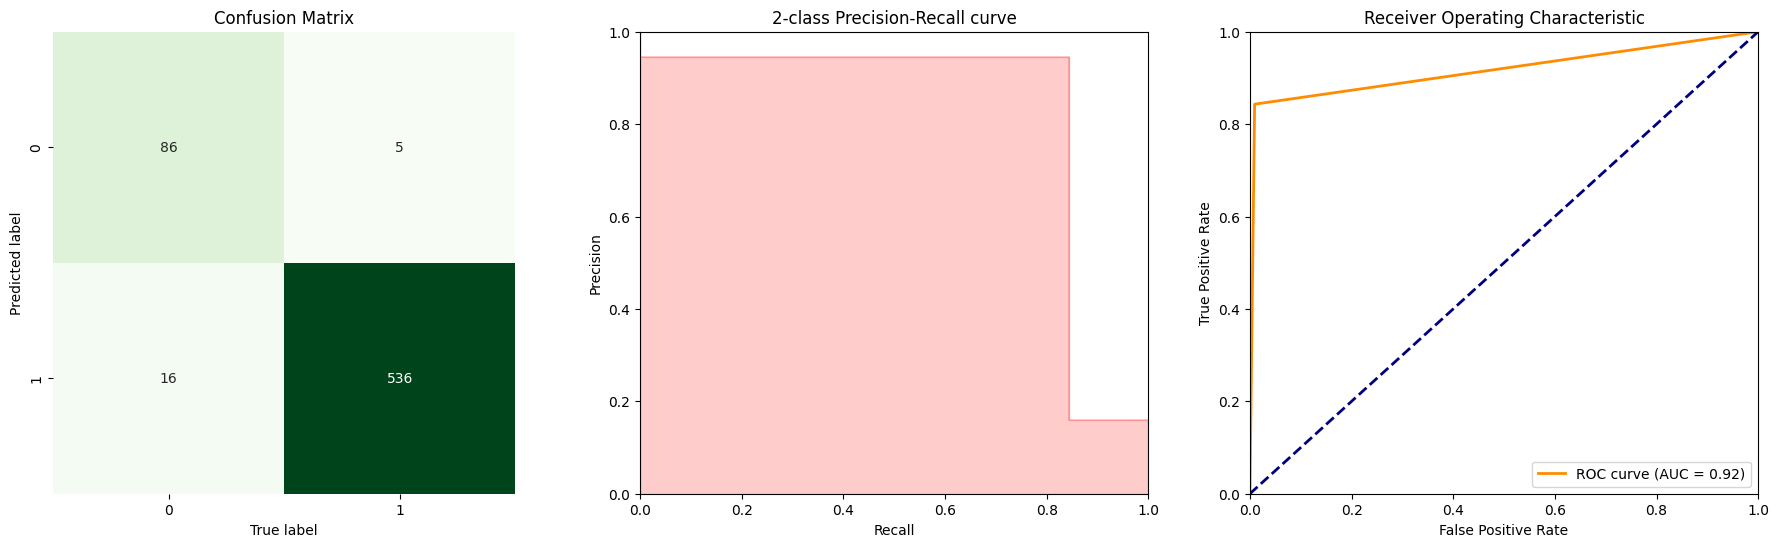

In [99]:
show_summary_report(y_test, y_test_pred)

#### Print out the number of each type of classification in the testing dataset. The numbers should match the confusion matrix above.

In [100]:
rfc_true_positives = np.sum((y_test == 1) & (y_test_pred == 1))
print(f"True Positives: {rfc_true_positives}")

rfc_false_positives = np.sum((y_test == 0) & (y_test_pred == 1))
print(f"False Positives: {rfc_false_positives}")

rfc_false_negatives = np.sum((y_test == 1) & (y_test_pred == 0))
print(f"False Negatives: {rfc_false_negatives}")

rfc_true_negatives = np.sum((y_test == 0) & (y_test_pred == 0))
print(f"True Negatives: {rfc_true_negatives}")

True Positives: 86
False Positives: 5
False Negatives: 16
True Negatives: 536


#### Create dataframes of each classification type within the test dataset, just for reference. You can print them out if you like, but we don't really need them.

In [101]:
# Identify true positives
rfc_test_true_positives = (y_test == 1) & (y_test_pred == 1)
# Extract the rows from X_test corresponding to true positives
rfc_test_tp_rows = X_test[rfc_test_true_positives]

# Identify false positives
rfc_test_false_positives = (y_test == 0) & (y_test_pred == 1)
# Extract the rows from X_test corresponding to false positives
rfc_test_fp_rows = X_test[rfc_test_false_positives]

# Identify false positives
rfc_test_false_negatives = (y_test == 1) & (y_test_pred == 0)
# Extract the rows from X_test corresponding to false negatives
rfc_test_fn_rows = X_test[rfc_test_false_negatives]

# Identify false positives
rfc_test_true_negatives = (y_test == 0) & (y_test_pred == 0)
# Extract the rows from X_test corresponding to true negatives
rfc_test_tn_rows = X_test[rfc_test_true_negatives]

# 4. Binary classifier player lookup and comparisons
Have a player in mind? Use this function to look them up and see how both of our binary models (SVC and RFC) classified them!

(This is why we made those dataframes earlier.)

Enter your player on the line below in the quotes. Double check your spelling and keep in mind they may be listed under a particular name (for example, Hank Aaron is listed as Henry Aaron). Also remember the player must have hit 100 home runs and retired no later than 2018.

In [179]:
player_to_lookup = 'Lou Gehrig'

In [180]:
#Leaving this line here to ensure 'player_to_lookup' has been defined properly.
player_to_lookup

'Lou Gehrig'

Run the next cell to get your results

In [181]:
def check_svc_dfs(player_to_lookup, svc_tp_rows, svc_fp_rows, svc_fn_rows, svc_tn_rows):
    # Check if the index_string is in any of the dataframes
    if player_to_lookup in svc_tp_rows.index:
        return 'True positive'
    elif player_to_lookup in svc_fp_rows.index:
        return 'False positive'
    elif player_to_lookup in svc_fn_rows.index:
        return 'False negative'
    elif player_to_lookup in svc_tn_rows.index:
        return 'True negative'
    else:
        return 'Not in this dataset (either was active after 2018, did not hit 100 home runs, or does not exist (check spelling)'

svcresult = check_svc_dfs(player_to_lookup, svc_tp_rows, svc_fp_rows, svc_fn_rows, svc_tn_rows)

def check_rfc_dfs(player_to_lookup, rfc_tp_rows, rfc_fp_rows, rfc_fn_rows, rfc_tn_rows):
    # Check if the index_string is in any of the dataframes
    if player_to_lookup in rfc_tp_rows.index:
        return 'True positive'
    elif player_to_lookup in rfc_fp_rows.index:
        return 'False positive'
    elif player_to_lookup in rfc_fn_rows.index:
        return 'False negative'
    elif player_to_lookup in rfc_tn_rows.index:
        return 'True negative'
    else:
        return 'Not in this dataset (either was active after 2018, did not hit 100 home runs, or does not exist (check spelling)'

rfcresult = check_rfc_dfs(player_to_lookup, rfc_tp_rows, rfc_fp_rows, rfc_fn_rows, rfc_tn_rows)

print(player_to_lookup, ':')
print('SVC', ':', svcresult)
print('RFC', ':', rfcresult)

Lou Gehrig :
SVC : True positive
RFC : True positive


In [108]:
# Find players that were true positives in both models
both_true_positive = svc_tp_rows.index.intersection(rfc_tp_rows.index)

# Convert the result to an array
both_true_positive.to_numpy()

array(['Henry Aaron', 'Babe Ruth', 'Willie Mays', 'Ken Griffey Jr.',
       'Jim Thome', 'Frank Robinson', 'Harmon Killebrew',
       'Reggie Jackson', 'Mike Schmidt', 'David Ortiz', 'Mickey Mantle',
       'Jimmie Foxx', 'Frank Thomas (DH)', 'Ted Williams', 'Ernie Banks',
       'Eddie Mathews', 'Mel Ott', 'Eddie Murray', 'Lou Gehrig',
       'Fred McGriff', 'Adrian Beltre', 'Stan Musial', 'Chipper Jones',
       'Dave Winfield', 'Carl Yastrzemski', 'Jeff Bagwell',
       'Vladimir Guerrero', 'Cal Ripken Jr.', 'Mike Piazza',
       'Billy Williams', 'Duke Snider', 'Al Kaline', 'Johnny Bench',
       'Harold Baines', 'Larry Walker', 'Jim Rice', 'Tony Perez',
       'Todd Helton', 'Joe DiMaggio', 'Johnny Mize', 'Yogi Berra',
       'Dick Allen', 'Ron Santo', 'Hank Greenberg', 'George Brett',
       'Scott Rolen', 'Ivan Rodriguez', 'Edgar Martinez', 'Al Simmons',
       'Rogers Hornsby', 'Chuck Klein', 'Larry Doby', 'Derek Jeter',
       'Robin Yount', 'Goose Goslin', 'Ted Simmons', 'Hac

In [109]:
# Find players that were false positives in both models
both_false_positive = svc_fp_rows.index.intersection(rfc_fp_rows.index)

# Convert the result to an array
both_false_positive.to_list()

['Alex Rodriguez',
 'Rafael Palmeiro',
 'Manny Ramirez',
 'Gary Sheffield',
 'Ken Williams']

In [110]:
print('False positive in both models', ':', both_false_positive.to_list())

False positive in both models : ['Alex Rodriguez', 'Rafael Palmeiro', 'Manny Ramirez', 'Gary Sheffield', 'Ken Williams']


In [111]:
# Find players that were false negatives in both models
both_false_negative = svc_fn_rows.index.intersection(rfc_fn_rows.index)

# Convert the result to an array
both_false_negative.to_list()

['Gary Carter',
 'Roy Campanella',
 'Joe Gordon',
 'Tony Oliva',
 'Barry Larkin',
 'Ernie Lombardi',
 'Tony Lazzeri',
 'George Kelly',
 'Joe Mauer',
 'Bill Mazeroski',
 'Travis Jackson',
 'Pee Wee Reese']

In [112]:
print('False negative in both models', ':', both_false_negative.to_list())

False negative in both models : ['Gary Carter', 'Roy Campanella', 'Joe Gordon', 'Tony Oliva', 'Barry Larkin', 'Ernie Lombardi', 'Tony Lazzeri', 'George Kelly', 'Joe Mauer', 'Bill Mazeroski', 'Travis Jackson', 'Pee Wee Reese']


In [113]:
# Find players that were true negatives in both models
both_true_negative = svc_tn_rows.index.intersection(rfc_tn_rows.index)

# Convert the result to an array
both_true_negative.to_numpy()

array(['Carlos Delgado', 'Adam Dunn', 'Dave Kingman', 'Andruw Jones',
       'Darrell Evans', 'Alfonso Soriano', 'Mark Teixeira',
       'Andres Galarraga', 'Dale Murphy', 'Joe Carter', 'Graig Nettles',
       'Aramis Ramirez', 'Ryan Howard', 'Frank Howard', 'Matt Williams',
       'Norm Cash', 'Lance Berkman', 'Gary Gaetti', 'Greg Vaughn',
       'Lee May', 'Chili Davis', 'George Foster', 'Jose Bautista',
       'Tino Martinez', 'Boog Powell', 'Don Baylor', 'Darryl Strawberry',
       'Bobby Bonds', 'Derrek Lee', 'Shawn Green', 'Mo Vaughn',
       'Jermaine Dye', 'Willie Horton', 'Lance Parrish', 'Ron Gant',
       'Vinny Castilla', 'Troy Glaus', 'Cecil Fielder', 'Prince Fielder',
       'Roy Sievers', 'Adrian Gonzalez', 'Ron Cey', 'Matt Holliday',
       'Jeromy Burnitz', 'Jay Buhner', 'Greg Luzinski', 'Miguel Tejada',
       'Richie Sexson', 'Ruben Sierra', 'Raul Ibanez', 'David Justice',
       'Reggie Sanders', 'Steve Finley', 'Tim Salmon', 'Robin Ventura',
       'Kent Hrbek', 'P

In [114]:
print('Both models true positive', ':', len(both_true_positive))
print('Both models false positive', ':', len(both_false_positive))
print('Both models false negatives', ':', len(both_false_negative))
print('Both models true negatives', ':', len(both_true_negative))

Both models true positive : 93
Both models false positive : 5
Both models false negatives : 12
Both models true negatives : 624


# 5. Linear Regression
Using other stats, attempt to predict every player's career batting average.

In [115]:
#Set features as all columns, except the index and 'BA'
#Set target as 'BA'
X = mlb.drop(columns=['BA'])
y = mlb['BA']

In [116]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [117]:
linreg = LinearRegression()

In [118]:
linreg.fit(X_train,y_train)

LinearRegression()

In [119]:
linreg.intercept_

0.08072644657809427

In [120]:
linreg.coef_

array([ 1.50954897e+06, -1.50954897e+06, -1.50954897e+06,  1.50954897e+06,
        3.90224495e-06, -1.53169437e-04,  1.51922068e-04, -6.02481992e-06,
        2.35128845e-05,  3.02946959e-05,  3.19181028e-05, -4.55761376e-05,
        6.68370166e-06,  1.94358807e-06,  1.84391802e-05,  1.57079544e-05,
        1.10514327e-04, -7.69446928e-06, -4.78621507e-01, -6.91182474e-01,
        9.59744127e-01, -1.27147976e-04, -1.54419176e-05,  1.46980125e-05,
        1.21893642e-04,  1.76341272e-04,  1.49879629e-04,  3.10569021e-05,
       -3.62006093e-04])

In [121]:
linreg.score(X_train, y_train)

0.955047775942637

In [122]:
linreg.score(X_test, y_test)

0.9331468133360155

In [123]:
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])
print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'pandas.core.frame.DataFrame'>
X_train has %d rows 160

Sample of X_train__________________________________________________
                   Debuted  Debut_age  Retired  Ret_age     G     PA     AB  \
Player                                                                        
Rico Carty            1963         23     1979       39  1651   6318   5606   
Paul Molitor          1978         21     1998       41  2683  12167  10835   
Leo Cardenas          1960         21     1975       36  1941   7402   6707   
Jason Bay             2003         24     2013       34  1278   5258   4505   
Lyle Overbay          2001         24     2014       37  1587   5802   5102   
Todd Hundley          1990         21     2003       34  1225   4305   3769   
Frank Thomas (DH)     1990         22     2008       40  2322  10075   8199   
Jimmy Ryan            1885         22     1903       40  2014   9127   8172   
Scott Rolen           1996         21     2012       37  2038   85

In [124]:
y_pred = linreg.predict(X)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred, squared=True)

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.6849619263997452e-05

In [126]:
from sklearn.model_selection import KFold

In [127]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
  # Get training and test sets for X and y
  X_train = X.iloc[train, ]
  y_train = y.iloc[train, ]
  X_test = X.iloc[test, ]
  y_test = y.iloc[test, ]
  # Fit model with training set
  linreg.fit(X_train, y_train)
  # Make predictions with training and test set
  train_preds = linreg.predict(X_train)
  test_preds = linreg.predict(X_test)
  # Score R2 and RMSE on training and test sets and store in list
  train_scores.append(linreg.score(X_train, y_train))
  test_scores.append(linreg.score(X_test, y_test))
  train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
  test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores,
              'Test R2': test_scores,
              'Training RMSE': train_rmse,
              'Test RMSE': test_rmse},
             index=[i+1 for i in range(5)])
metrics_df

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.952561,0.926650,0.005130,0.005795
2,0.949075,0.947106,0.005170,0.005582
3,0.952568,0.934163,0.005119,0.005695
4,0.947002,0.954047,0.005326,0.005079
5,0.950847,0.939728,0.005122,0.005848


In [128]:
# Store R^2 scores by number of features
r2_scores = []

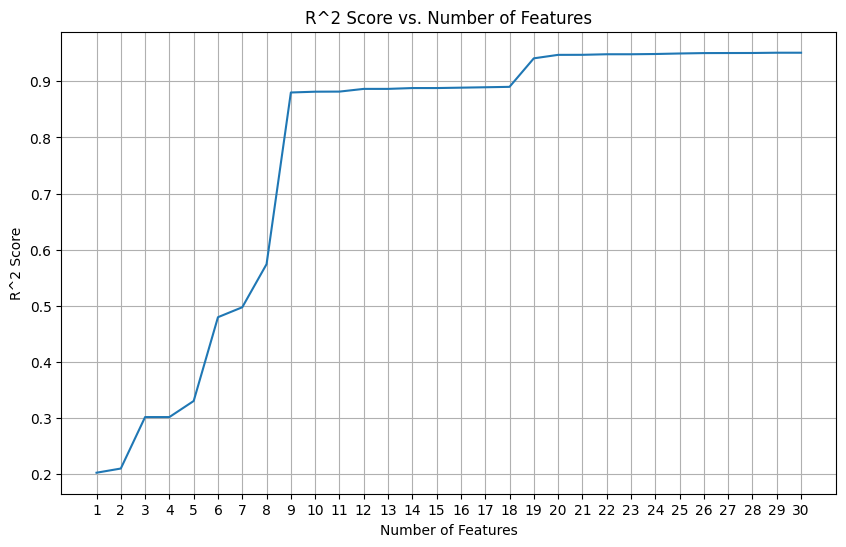

In [129]:
# Loop over the number of features (up to 30)
for n_features in range(1, 31):
    # Select the first n_features from X_train (sorted alphabetically)
    selected_features = X_train.columns[:n_features]
    X_train_subset = X_train[selected_features]
    
    # Fit the model with the selected features
    linreg.fit(X_train_subset, y_train)
    
    # Calculate R^2 score on the training data
    r2 = linreg.score(X_train_subset, y_train)
    
    # Store the score
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), r2_scores)
plt.title('R^2 Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.xticks(np.arange(1, 31, step=1))
plt.grid(True)
#plt.savefig('R2 score vs number of features.png')
plt.show()

20 features seems to be the sweet spot between a high R2 score and using less processing power, as returns are diminishing afterwards. Let's run a function to select the best features, with a limit of 20.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [131]:
# Start with no predictors
included = []
# Keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# Create a model object for Linear Regression
model = LinearRegression()
# Get the number of cases in the training data
n = X_train.shape[0]
# Define the maximum number of features
max_features = 20

show_steps = False  # Set to False to save space, you can set it to True to debug if you like

# Ensure features are sorted for consistent order
features = sorted(X.columns)

while True:
    changed = False
    if show_steps:
        print('')
    # List the features to be evaluated
    excluded = list(set(features) - set(included))
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))
    # For each remaining feature to be evaluated
    for new_column in excluded:
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))
        # Fit the model with the training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # Calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # Number of predictors in this model
        k = len(included + [new_column])
        # Calculate the adjusted R^2
        adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - k - 1))
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))
        # If model improves
        if adjusted_r2 > best['a_r2']:
            # Record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # Flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    # If found a better model after testing all remaining features
    if changed:
        # Update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
              (best['feature'], best['r2'], best['a_r2']))
        # Terminate if the number of selected features reaches the limit
        if len(included) >= max_features:
            print(f"Reached the maximum limit of {max_features} features.")
            print('*' * 50)
            break
    else:
        # Terminate if no better model
        print('*' * 50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature OBP  with R^2 = 0.552 and adjusted R^2 = 0.549
Added feature 3B   with R^2 = 0.690 and adjusted R^2 = 0.686
Added feature BB   with R^2 = 0.762 and adjusted R^2 = 0.758
Added feature H    with R^2 = 0.914 and adjusted R^2 = 0.912
Added feature PA   with R^2 = 0.926 and adjusted R^2 = 0.924
Added feature OPS  with R^2 = 0.934 and adjusted R^2 = 0.931
Added feature SO   with R^2 = 0.942 and adjusted R^2 = 0.940
Added feature TB   with R^2 = 0.946 and adjusted R^2 = 0.943
Added feature CS   with R^2 = 0.948 and adjusted R^2 = 0.945
Added feature IBB  with R^2 = 0.950 and adjusted R^2 = 0.946
Added feature HBP  with R^2 = 0.951 and adjusted R^2 = 0.947
Added feature OPS+ with R^2 = 0.952 and adjusted R^2 = 0.948
Added feature SB   with R^2 = 0.952 and adjusted R^2 = 0.948
Added feature SH   with R^2 = 0.953 and adjusted R^2 = 0.948
Added feature Ret_age with R^2 = 0.954 and adjusted R^2 = 0.949
**************************************************

Resulting features:
OBP, 3B, B

In [132]:
included

['OBP',
 '3B',
 'BB',
 'H',
 'PA',
 'OPS',
 'SO',
 'TB',
 'CS',
 'IBB',
 'HBP',
 'OPS+',
 'SB',
 'SH',
 'Ret_age']

Define a new model with our new features.

In [133]:
features = ['OBP',
 '3B',
 'BB',
 'H',
 'PA',
 'OPS',
 'SO',
 'TB',
 'CS',
 'IBB',
 'HBP',
 'OPS+',
 'SB',
 'SH',
 'Ret_age']

target = ['BA']

In [134]:
X = mlb[features]
y = mlb[target]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [137]:
linregbest = LinearRegression()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [139]:
linregbest.fit(X_train,y_train)

LinearRegression()

In [140]:
linregbest.intercept_

array([0.00406223])

In [141]:
linregbest.coef_

array([[ 2.64698468e-01, -6.59039160e-05, -4.89742372e-05,
         5.43145813e-05,  1.03344356e-06,  2.46129987e-01,
        -8.07550930e-06, -2.00971557e-05,  1.14045628e-05,
         3.80714167e-05, -3.92731868e-05, -1.05731712e-04,
         1.15521424e-05,  2.92369637e-05, -2.62431742e-04]])

In [142]:
linregbest.score(X_train, y_train)

0.9535860459479915

In [143]:
linregbest.score(X_test, y_test)

0.9312131235980431

In [144]:
y_pred = linregbest.predict(X)
y_train_pred = linregbest.predict(X_train)
y_test_pred = linregbest.predict(X_test)

In [145]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred, squared=True)

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.7722699398428993e-05

In [146]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
  # Get training and test sets for X and y
  X_train = X.iloc[train, ]
  y_train = y.iloc[train, ]
  X_test = X.iloc[test, ]
  y_test = y.iloc[test, ]
  # Fit model with training set
  linreg.fit(X_train, y_train)
  # Make predictions with training and test set
  train_preds = linreg.predict(X_train)
  test_preds = linreg.predict(X_test)
  # Score R2 and RMSE on training and test sets and store in list
  train_scores.append(linreg.score(X_train, y_train))
  test_scores.append(linreg.score(X_test, y_test))
  train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
  test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores,
              'Test R2': test_scores,
              'Training RMSE': train_rmse,
              'Test RMSE': test_rmse},
             index=[i+1 for i in range(5)])
metrics_df

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.947096,0.942278,0.005425,0.005253
2,0.948951,0.931422,0.005222,0.006226
3,0.941545,0.957933,0.005431,0.005323
4,0.948723,0.935039,0.005309,0.005715
5,0.948129,0.935883,0.005377,0.005454


### Our adjustments didn't improve the model, so let's go back to our original.

Redefine y_pred, y_train_pred, and y_test_pred so that they will refer to the original model.

In [166]:
y_pred = linreg.predict(X)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Here is a dataframe of all players in the dataset listed with their actual BA, predicted BA, and the difference between the two.

In [152]:
# Make a dataframe of y_pred values
pred_ba = pd.DataFrame(y_pred, columns=['Predicted_BA'], index=X.index)
pred_ba['Predicted_BA'] = pred_ba['Predicted_BA'].round(3)

# Make a dataframe of actual batting averages (we can take this directly from the original dataframe)
actual_ba = mlb[['BA']]

# Combine the two DataFrames along columns (axis=1)
battingaverages = pd.concat([actual_ba, pred_ba], axis=1)

# Optionally, rename the columns to make them clearer
battingaverages.columns = ['Actual_BA', 'Predicted_BA']

# Make an additional column displaying the differences between actual and predicted batting averages
battingaverages['Actual_vs_pred'] = battingaverages['Actual_BA'] - battingaverages['Predicted_BA']
battingaverages['Actual_vs_pred'] = battingaverages['Actual_vs_pred'].round(3)

# Print the new dataframe
battingaverages

,Actual_BA,Predicted_BA,Actual_vs_pred
Player,,,
Barry Bonds,0.298,0.283,0.015
Henry Aaron,0.305,0.315,-0.010
Babe Ruth,0.342,0.331,0.011
Alex Rodriguez,0.295,0.291,0.004
Willie Mays,0.301,0.302,-0.001
...,...,...,...
Augie Galan,0.287,0.287,0.000
Mike Jacobs,0.253,0.258,-0.005
John Kruk,0.300,0.293,0.007


Find the 20 players whose batting averages were most underestimated.

In [153]:
# Sort the dataframe by 'Actual_vs_pred' in descending order to get the top 20
underestimated = battingaverages.sort_values(by='Actual_vs_pred', ascending=False).head(10)

# Print the new DataFrame
underestimated

,Actual_BA,Predicted_BA,Actual_vs_pred
Player,,,
Lefty O'Doul,0.349,0.333,0.016
Barry Bonds,0.298,0.283,0.015
Delmon Young,0.283,0.268,0.015
Jim Thome,0.276,0.263,0.013
Oscar Charleston,0.364,0.352,0.012
Shea Hillenbrand,0.284,0.272,0.012
Mike Easler,0.293,0.282,0.011
Reggie Jackson,0.262,0.251,0.011
Ellis Valentine,0.278,0.267,0.011


Find the 20 players whose batting averages where most overestimated.

In [154]:
# Sort the dataframe by 'Actual_vs_pred' in descending order to get the top 20
overestimated = battingaverages.sort_values(by='Actual_vs_pred', ascending=True).head(10)

# Print the new DataFrame
overestimated

,Actual_BA,Predicted_BA,Actual_vs_pred
Player,,,
Ken Phelps,0.239,0.274,-0.035
Jack Cust,0.242,0.266,-0.024
Pete Rose,0.303,0.327,-0.024
Chris Carter,0.217,0.240,-0.023
Ty Cobb,0.366,0.389,-0.023
Russell Branyan,0.232,0.252,-0.020
Tony Gwynn,0.338,0.357,-0.019
David Ross,0.229,0.244,-0.015
Lou Brock,0.293,0.308,-0.015


### Have a player in mind? Look them up to see how well the model predicted their batting average!

In [296]:
def lookup_index(df, index_value):
    try:
        # Use .loc to get the row by index
        row = df.loc[index_value]
        print(f"{index_value}:")
        print(row)
    except KeyError:
        print('Not in this dataset (either was active after 2018, did not hit 100 home runs, or does not exist (check spelling)')

In [297]:
# Assuming 'battingaverages' is the DataFrame and you want to look up an index (e.g., 10)
lookup_index(battingaverages, 'Pete Rose')

Pete Rose:
Actual_BA         0.303
Predicted_BA      0.317
Actual_vs_pred   -0.014
Name: Pete Rose, dtype: float64
